#Task 6

#Prediction using Decision Tree Algorithm

In [32]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [33]:
#Loading the dataset
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
df.shape

(150, 6)

#Missing value analysis

In [36]:
#Checking if the data has any missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#Outlier analysis

An outlier is an observation that appears to deviate markedly from other observations in the sample. Otherwise, Outliers are extreme values that stand out greatly from the overall pattern of values in a dataset or graph.





Outlier analysis is critical in analyzing the data for at least two reasons:


1.The outliers may negatively bias the entire outcome of an analysis.


2.Detect points that are considered “abnormal,” or which don't fit a particular pattern.

In [37]:
#Checking the data has outliers
def detect_outliers_iqr(data):
    outliers = []
    #data = sorted(data)
    q1 = np.quantile(data, 0.25)
    q3 = np.quantile(data, 0.75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    #print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            #print(i)
    return outliers

In [38]:
columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i in columns: 
  print("Outliers in", i,":", len(detect_outliers_iqr(df[i])))

Outliers in SepalLengthCm : 0
Outliers in SepalWidthCm : 4
Outliers in PetalLengthCm : 0
Outliers in PetalWidthCm : 0


In [39]:
#Since there are outliers in the data and number of outliers are less, we trim them out the data
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df['SepalWidthCm'].quantile(0.75)
IQR=Q3-Q1
#Upper bound
upper = np.where(df['SepalWidthCm'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where(df['SepalWidthCm'] <= (Q1-1.5*IQR))
#Trimming the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)
 

New Shape:  (146, 6)


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


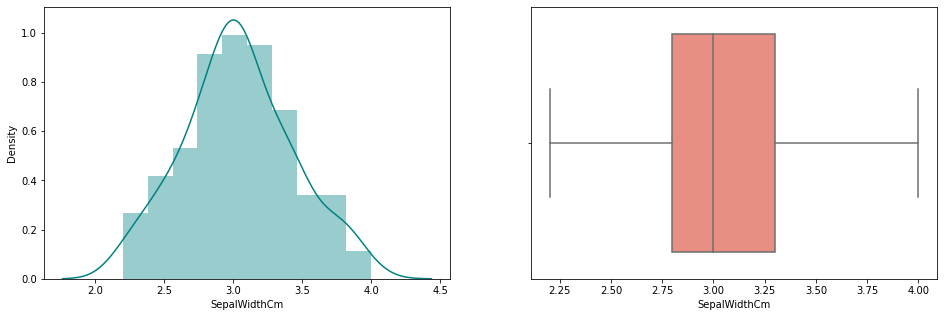

In [40]:
#Outliers for the SepalWidthCm column are TRIMMED
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['SepalWidthCm'],color='teal')
plt.subplot(1,2,2)
sns.boxplot(df['SepalWidthCm'],color='salmon') 

#Building the model using Decision Tree Algorithm

In [41]:
#Assigning the independent variables to x and dependent variables to y
X = df.drop(['Species'], axis=1)
y=df['Species']

#Train Test Splitting

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
#shapes of splitted data
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (116, 5)
X_test: (30, 5)
Y_train: (116,)
Y_test: (30,)


In [44]:
#Building the model on training data
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#Predicting the class using test data
Y_pred = dt.predict(X_test)

[Text(0.6, 0.8333333333333334, 'X[0] <= 100.5\ngini = 0.666\nsamples = 116\nvalue = [36, 39, 41]'),
 Text(0.4, 0.5, 'X[0] <= 50.5\ngini = 0.499\nsamples = 75\nvalue = [36, 39, 0]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]')]

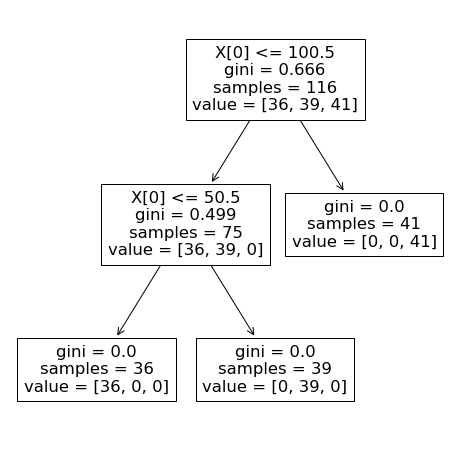

In [46]:
#Plotting the tree
from sklearn import tree
plt.figure(figsize=(8,8))
tree.plot_tree(dt)

#Evaluating the model

In [47]:
print(metrics.accuracy_score(y_test, Y_pred))

1.0


In [48]:
print(classification_report(y_test,Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

